In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
a = {'a': 1, 'b': 2, 'c': 3}

np.mean(list(a.values()))

2.0

In [13]:
def final_policy_analysis(path): 

    # Load CSV (evaluation log)
    df = pd.read_csv(path)

    # --- Identify sellers, buyers, and rewards columns ---
    seller_cols  = [col for col in df.columns if col.endswith("_power")]
    buyer_cols   = [col for col in df.columns if col.endswith("_price")]
    reward_cols  = [col for col in df.columns if col.endswith("_reward")]

    # --- Compute mean per step across all episodes ---
    grouped = df.groupby("step").mean(numeric_only=True)

    # Sellers: average power per step
    seller_means = grouped[seller_cols]

    # Buyers: average price per step
    buyer_means = grouped[buyer_cols]

    # Rewards: average reward per step
    reward_means = grouped[reward_cols]

    # --- Plot sellers ---
    plt.figure(figsize=(10,5))
    for col in seller_means.columns:
        plt.plot(seller_means.index, seller_means[col], label=col)
    plt.xlabel("Step")
    plt.ylabel("Mean Power")
    plt.title("Mean Seller Power per Step (averaged over episodes)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot buyers ---
    plt.figure(figsize=(10,5))
    for col in buyer_means.columns:
        plt.plot(buyer_means.index, buyer_means[col], label=col)
    plt.xlabel("Step")
    plt.ylabel("Mean Price")
    plt.title("Mean Buyer Price per Step (averaged over episodes)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # --- Plot rewards ---
    plt.figure(figsize=(10,5))
    for col in reward_means.columns:
        plt.plot(reward_means.index, reward_means[col], label=col)
    plt.xlabel("Step")
    plt.ylabel("Mean Reward")
    plt.title("Mean Agent Reward per Step (averaged over episodes)")
    plt.legend()
    plt.grid(True)
    plt.show()


In [14]:
def plot_reward(path):
    # Load training CSV
    df = pd.read_csv(path)

    # Clean NaNs (in case of first rows with NaN)
    df = df.dropna(subset=["episode_reward_mean", "episode_reward_max", "episode_reward_min"])

    # Extract columns
    iters = df["training_iteration"]
    mean_rewards = df["episode_reward_mean"]
    max_rewards = df["episode_reward_max"]
    min_rewards = df["episode_reward_min"]

    # --- Plot ---
    plt.figure(figsize=(10,6))
    plt.plot(iters, mean_rewards, label="Mean Reward", color="blue")
    plt.fill_between(iters, min_rewards, max_rewards, color="blue", alpha=0.2, label="Minâ€“Max Range")

    plt.xlabel("Training Iteration")
    plt.ylabel("Episode Reward")
    plt.title("Training Rewards Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

# MAA2C

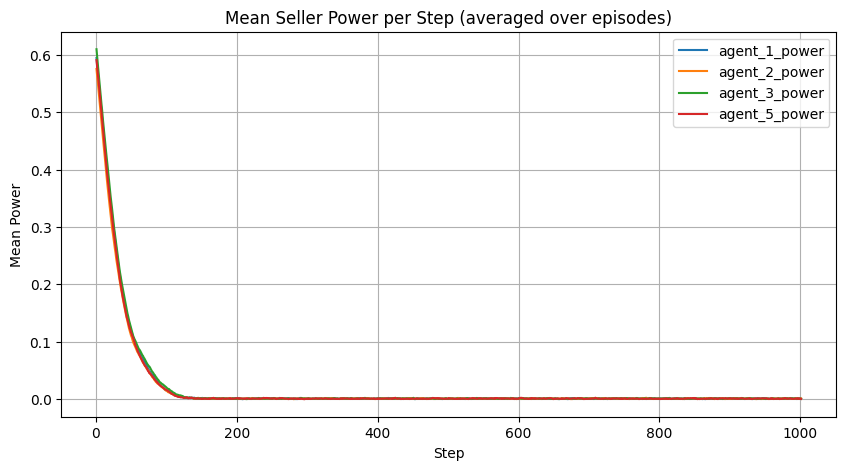

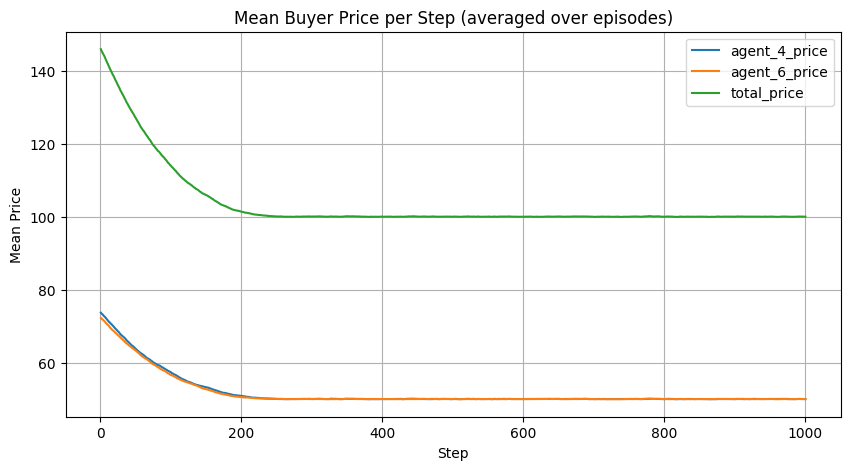

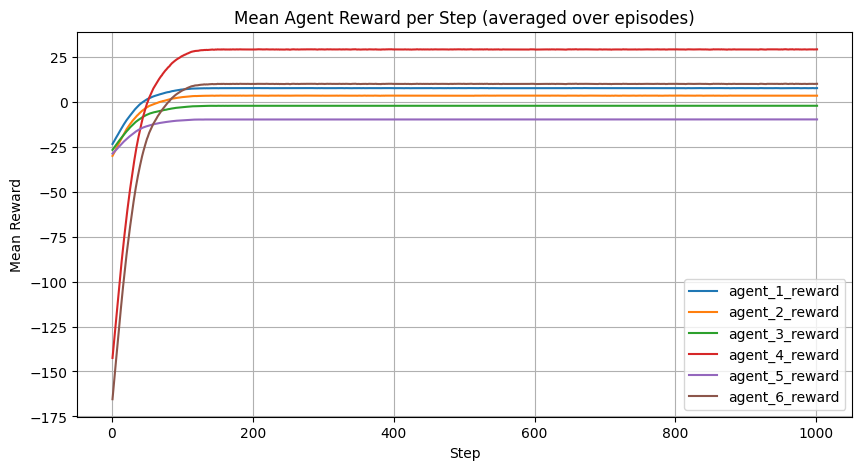

In [6]:
path = "evaluated_policies/maa2c_mlp_P2PEnergyEnv/adapted_chacon_2025-09-24_21-26-35/market_log.csv"
final_policy_analysis(path)

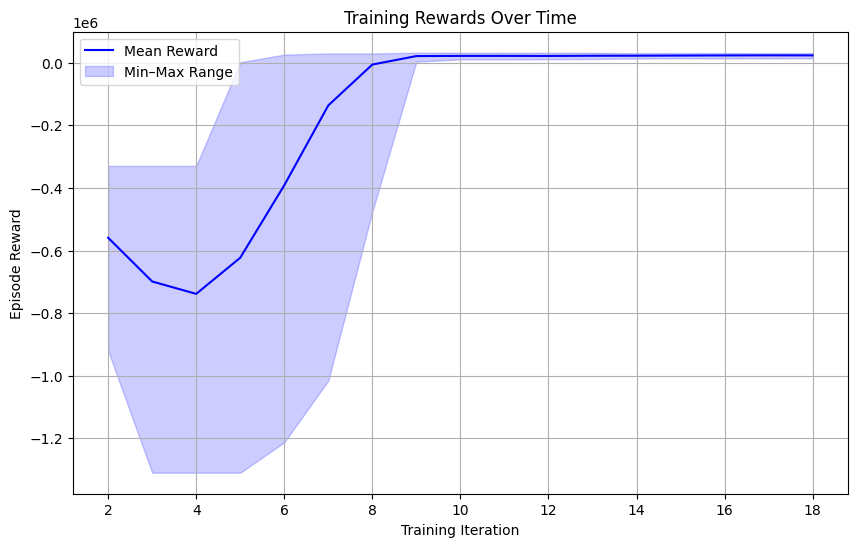

In [59]:
path = "../trained_policies/maa2c_mlp_P2PEnergyEnv/energy_market_adapted_1M-it_2025-09-24_21-21-20/progress.csv"
plot_reward(path)

# MAPPO

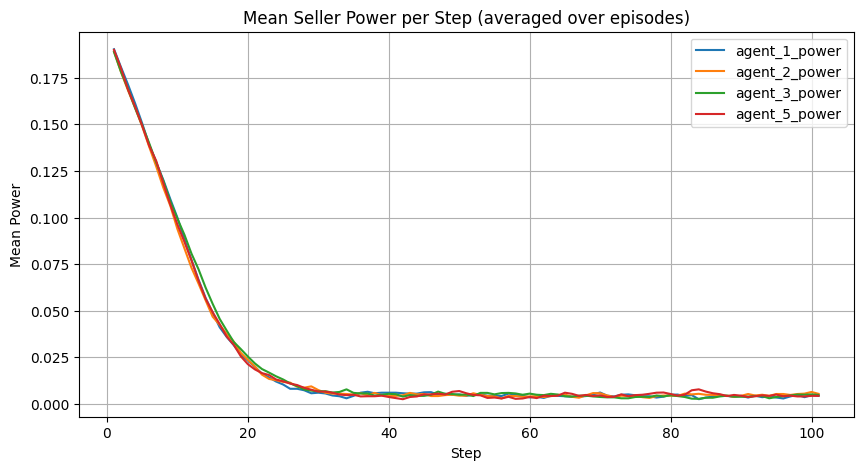

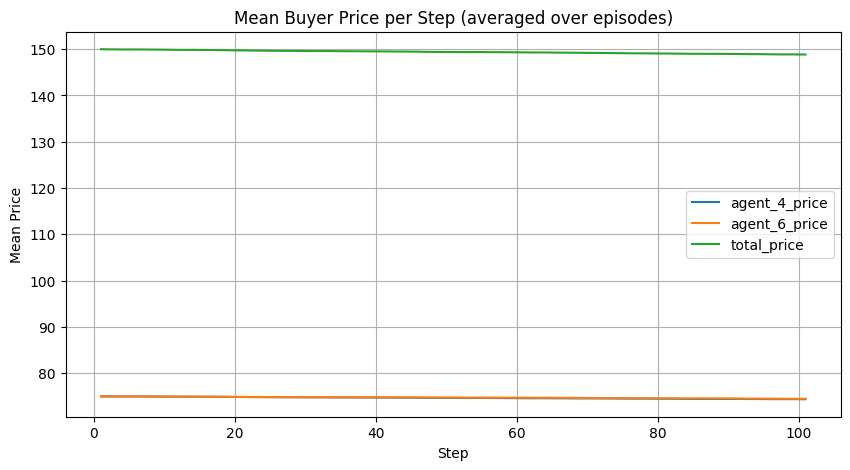

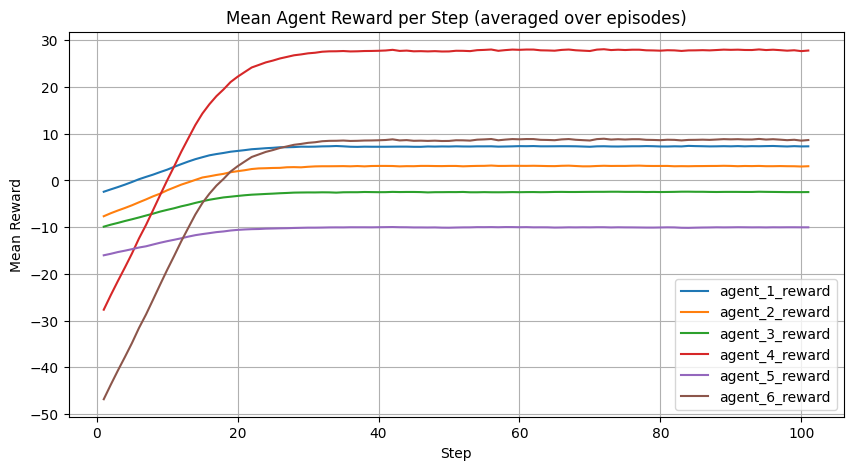

In [7]:
path = "evaluated_policies/mappo_mlp_P2PEnergyEnv/adapted_chacon_2025-09-24_20-04-26/market_log.csv"
final_policy_analysis(path)

# Barrier functions

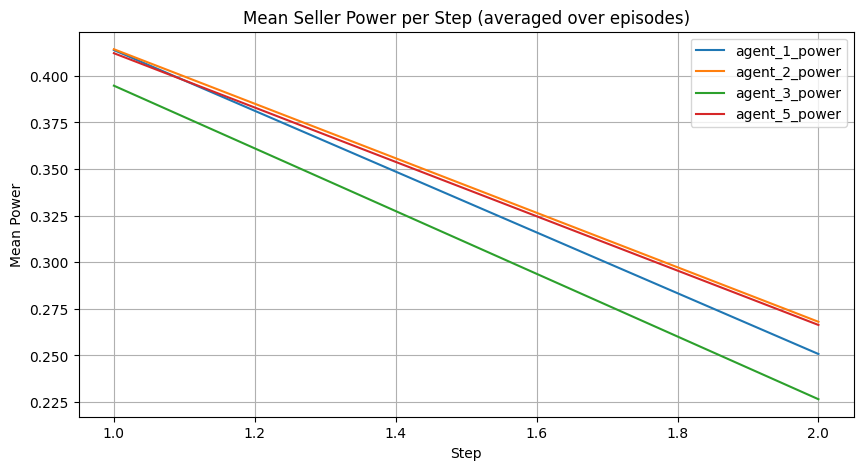

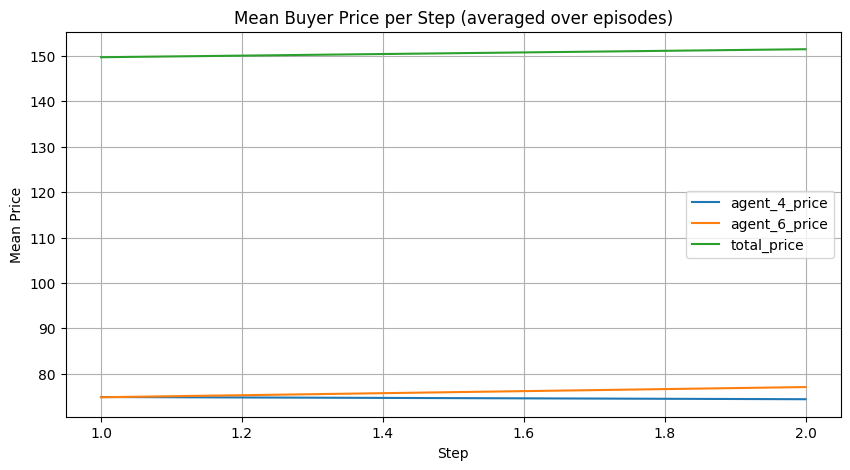

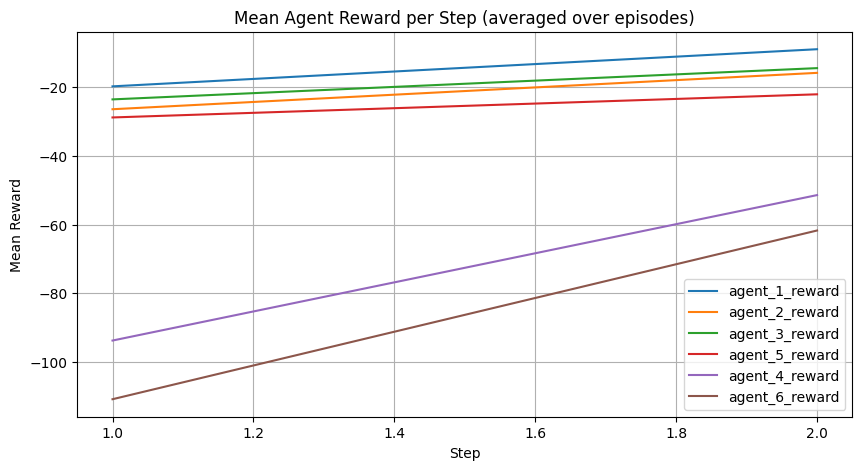

In [24]:
path = "evaluated_policies/maa2c_mlp_P2PEnergyEnv/energy_market_constrains_2025-10-03_13-02-41/market_log.csv"
final_policy_analysis(path)

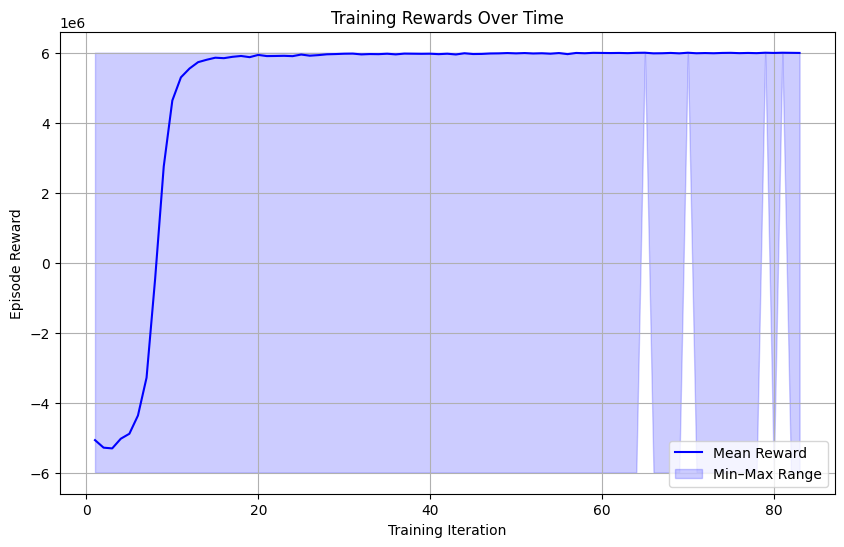

In [23]:
path = "../trained_policies/maa2c_mlp_P2PEnergyEnv/energy_market_2025-10-03_13-01-17/progress.csv"
plot_reward(path)